# Agent that beats random in 3x3x3 100/100 times.

In [46]:
from tictactoe import Board3D, TicTacToe
from sim import simulate
from agent import RandomAgent, MiniMaxAgent
from eval_functions import dist
import numpy as np

from utils import plot_agent_results

In [39]:
def num_two_in_a_row(node, player):
    board = node.state
    
    if board.get_winner() == player:
        return 10000000
    elif board.get_winner() == -player:
        return -10000000
    
    score = 0
    
    matrix = board.board
    
    for i in range(matrix.shape[0]):
        m_small = matrix[i,:,:]
        score += 10 * np.count_nonzero(np.sum(m_small,axis=0)==(2*player))
        score -= 10 * np.count_nonzero(np.sum(m_small,axis=0)==(-2*player))
        score += 10 * np.count_nonzero(np.sum(m_small,axis=1)==(2*player))
        score -= 10 * np.count_nonzero(np.sum(m_small,axis=1)==(-2*player))
        
        m_small = matrix[:,i,:]
        score += 10 * np.count_nonzero(np.sum(m_small,axis=0)==(2*player))
        score -= 10 * np.count_nonzero(np.sum(m_small,axis=0)==(-2*player))
        score += 10 * np.count_nonzero(np.sum(m_small,axis=1)==(2*player))
        score -= 10 * np.count_nonzero(np.sum(m_small,axis=1)==(-2*player))
    
    return score

In [42]:
def center_dist(node, player):
    board = node.state
    if board.get_winner() == player:
        return 10000000
    elif board.get_winner() == -player:
        return -10000000
    center = np.array([1,1,1])
    
    player_locs = list(zip(*np.where(board == player)))
    
    sum_dist = 0
    for coord in player_locs:
        dist = np.linalg.norm(np.array([coord[0], coord[1], coord[2]]) - np.array(center))
        sum_dist += dist
        
    return -sum_dist

In [17]:
rand = RandomAgent()

In [43]:
agent3d_mm = MiniMaxAgent(num_two_in_a_row, depth=1, name='twos', using_ab_pruning = True)
agent3d_cd = MiniMaxAgent(center_dist, depth=1, name='center distance', using_ab_pruning = True)

In [41]:
simulate(Board3D(size=3), rand, agent3d_mm, num_sims=100)

{'draw': 0, 'RandomAgent': 1, 'twos': 99}

In [44]:
simulate(Board3D(size=3), rand, agent3d_cd, num_sims=100)

{'draw': 0, 'RandomAgent': 0, 'center distance': 100}

In [45]:
simulate(Board3D(size=3), agent3d_mm, agent3d_cd, num_sims=100)

{'draw': 0, 'twos': 100, 'center distance': 0}

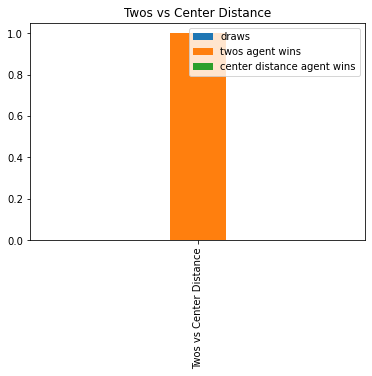

In [49]:
res = {'draw': 0, 'twos': 100, 'center distance': 0}
plot_agent_results([res], agent1 = agent3d_mm, agent2 = agent3d_cd, x=['Twos vs Center Distance'], title = 'Twos vs Center Distance')

## But it's just about as good as the neighbors baseline

In [50]:
from eval_functions import neighbors_eval

neighbors_baseline = MiniMaxAgent(neighbors_eval, depth=2, name='neighbors')

In [51]:
simulate(Board3D(size=3), neighbors_baseline, agent3d, num_sims=100)

{'draw': 0, 'neighbors': 50, 'twos': 50}